In [1]:
import pandas as pd

df = pd.read_csv("/Users/heejin/code/gongmo/src/docs/wedo.csv", encoding="cp949")
print(df)

          연번  자치구 신호등종류         위도          경도                주소
0          1  강남구   보행등  37.498560  127.044475     강남구 역삼동 710 대
1          2  강남구   보행등  37.509105  127.033164  강남구 논현동 219-12 대
2          3  강남구   보행등  37.495683  127.085581      강남구 일원동 460천
3          4  강남구   보행등  37.495809  127.085987      강남구 일원동 460천
4          5  강남구   보행등  37.534857  127.034393     강남구 압구정동 484천
...      ...  ...   ...        ...         ...               ...
24133  24134  중랑구   보행등  37.616689  127.079436     중랑구 묵동 649-4대
24134  24135  중랑구   보행등  37.616689  127.079436     중랑구 묵동 649-4대
24135  24136  중랑구   보행등  37.614251  127.091812     중랑구 신내동 640 차
24136  24137  중랑구   보행등  37.616534  127.079397     중랑구 묵동 656-2도
24137  24138  중랑구   보행등  37.589911  127.095005   중랑구 면목동 521-2 대

[24138 rows x 6 columns]


In [3]:
import pandas as pd

df = pd.read_csv("/Users/heejin/code/gongmo/src/docs/wedo.csv", encoding="cp949")
df_walk = df[df['신호등종류'] == '보행등']

walk_counts = df_walk['자치구'].value_counts().reset_index()
walk_counts.columns = ['자치구', '보행등 개수']

walk_counts = walk_counts.sort_values(by='보행등 개수', ascending=False).reset_index(drop=True)

print(walk_counts)

     자치구  보행등 개수
0    강서구    1613
1    송파구    1516
2   영등포구    1497
3    강남구    1379
4    노원구    1207
5    마포구    1207
6    서초구    1179
7    강동구    1156
8    양천구    1134
9    구로구    1096
10   은평구    1046
11   성북구    1034
12   중랑구     869
13  동대문구     859
14   도봉구     736
15   관악구     708
16   강북구     707
17   성동구     706
18  서대문구     684
19   용산구     679
20   금천구     666
21    중구     636
22   광진구     632
23   종로구     626
24   동작구     566


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24],
 [Text(0, 0, '강서구'),
  Text(1, 0, '송파구'),
  Text(2, 0, '영등포구'),
  Text(3, 0, '강남구'),
  Text(4, 0, '노원구'),
  Text(5, 0, '마포구'),
  Text(6, 0, '서초구'),
  Text(7, 0, '강동구'),
  Text(8, 0, '양천구'),
  Text(9, 0, '구로구'),
  Text(10, 0, '은평구'),
  Text(11, 0, '성북구'),
  Text(12, 0, '중랑구'),
  Text(13, 0, '동대문구'),
  Text(14, 0, '도봉구'),
  Text(15, 0, '관악구'),
  Text(16, 0, '강북구'),
  Text(17, 0, '성동구'),
  Text(18, 0, '서대문구'),
  Text(19, 0, '용산구'),
  Text(20, 0, '금천구'),
  Text(21, 0, '중구'),
  Text(22, 0, '광진구'),
  Text(23, 0, '종로구'),
  Text(24, 0, '동작구')])

findfont: Font family 'Noto Sans KR' not found.
findfont: Font family 'Noto Sans KR' not found.
/Users/heejin/code/gongmo/.venv/lib/python3.13/site-packages/IPython/core/events.py:82: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/Users/heejin/code/gongmo/.venv/lib/python3.13/site-packages/IPython/core/events.py:82: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/Users/heejin/code/gongmo/.venv/lib/python3.13/site-packages/IPython/core/events.py:82: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
findfont: Font family 'Noto Sans KR' not found.
/Users/heejin/code/gongmo/.venv/lib/python3.13/site-packages/IPython/core/events.py:82: UserWarning: Glyph 49569 (\N{HANGUL SYLLABLE SONG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/Users/heejin/code/gongmo/.venv/lib/python3.13/site-packages/IPytho

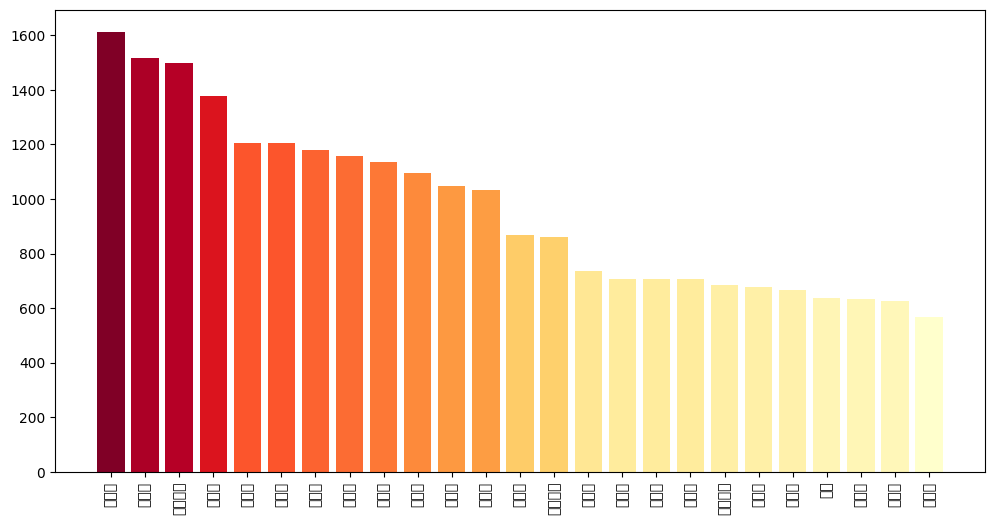

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

plt.rcParams['font.family'] = 'Noto Sans KR'

# 데이터 불러오기 및 전처리
df = pd.read_csv("/Users/heejin/code/gongmo/src/docs/wedo.csv", encoding="cp949")
df_walk = df[df['신호등종류'] == '보행등']
walk_counts = df_walk['자치구'].value_counts().reset_index()
walk_counts.columns = ['자치구', '보행등 개수']
walk_counts = walk_counts.sort_values(by='보행등 개수', ascending=False).reset_index(drop=True)

# 색상 설정 (보행등 개수에 따라 색상 차등)
norm = colors.Normalize(vmin=walk_counts["보행등 개수"].min(), vmax=walk_counts["보행등 개수"].max())
colormap = cm.ScalarMappable(norm=norm, cmap="YlOrRd")
colors_list = [colors.to_hex(colormap.to_rgba(val)) for val in walk_counts["보행등 개수"]]

# 그래프 그리기
plt.figure(figsize=(12, 6))
plt.bar(walk_counts["자치구"], walk_counts["보행등 개수"], color=colors_list)
plt.xticks(rotation=90)

In [ ]:
#서울시 전체 보행등 현황을 분석한 결과,
#광진구는 전체 자치구 중 보행등 수 기준으로 하위 3위에 해당하며,
#이는 보행자 안전을 위한 인프라가 타 구에 비해 상대적으로 부족함을 의미

In [ ]:
##보행자 안전 불균형
#광진구는 상대적으로 보행등 수가 적은 자치구 중 하나입니다.
#보행등은 야간 보행자의 안전, 교통사고 방지, 도시 방범 효과에 큰 영향을 줍니다.
#보행등이 적다는 건: 야간 시야 확보 미흡, 범죄 위험 증가, 노약자·아동 보행 환경의 안전성 저하, 스마트시티 발전 속도에서 소외 가능성